## 트리 모델

<br>

- if-then-else 규칙의 집합체

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
## 그래프 한글 폰트 패치
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    rc('font',family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system')

In [3]:
iris = datasets.load_iris()
# iris

x = iris.data[:,[2,3]]
y = iris.target # 답

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=0)

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std  = sc.transform(x_test)

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib

def plot_decision_region(x,y,classifier,test_idx=None,resolution=0.02,title=''):
    markers = ('s','x','o','^','v')
    colors = ('r','b','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # decision surface 그리기
    x1_min,x1_max = x[:,0].min()-1, x[:,0].max() + 1
    x2_min,x2_max = x[:,1].min()-1, x[:,1].max() + 1
    xx,yy = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx.ravel(),yy.ravel()]).T)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10,10))
    
    plt.contourf(xx,yy,Z,alpha=0.5, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    x_test, y_test = x[test_idx, :],y[test_idx]
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl,0], y=x[y==cl,1], c=cmap(idx), marker=markers[idx],label=cl)
    
    if test_idx:
        x_test,y_test = x[test_idx, :], y[test_idx]
        plt.scatter(x_test[:,0],x_test[:,1], c="", linewidth=1, marker='o', s=80, label="테스트셋")
    
    plt.xlabel("표준화 된 꽃잎 길이")
    plt.xlabel("표준화 된 꽃잎 너비")
    plt.legend(loc=2)
    plt.title(title)
    plt.show()


In [8]:
ml = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


총 테스트 개수:45, 총 오류개수:1
정확도:0.977778


C:\Users\Playdata\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Playdata\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


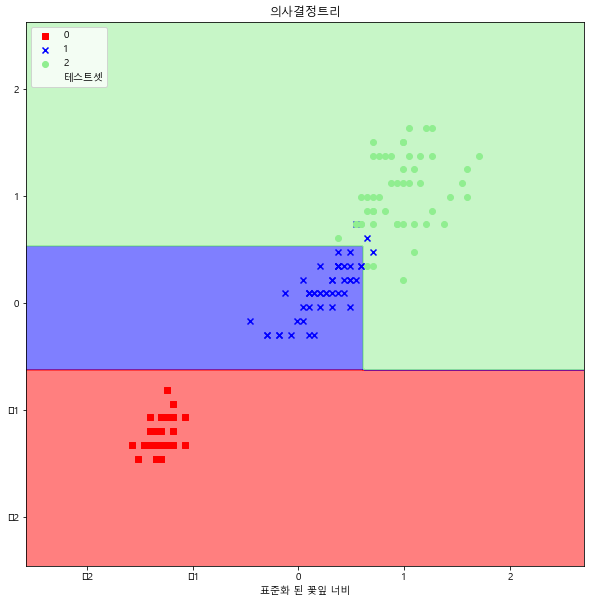

In [9]:
ml.fit(x_train_std, y_train)
y_pred = ml.predict(x_test_std)
print("총 테스트 개수:%d, 총 오류개수:%d" %(len(y_test),(y_test != y_pred).sum()))
print("정확도:%2f" %accuracy_score(y_test,y_pred))

x_combined_std = np.vstack((x_train_std,x_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_region(x=x_combined_std, y=y_combined, classifier=ml, test_idx=range(105,150), title="의사결정트리")

In [ ]:
# 코드참고 => https://m.blog.naver.com/samsjang/220979751089